# Lab 4:  Curve Fitting

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Part 1a.  Simple Line Fitting

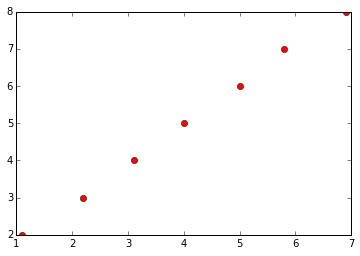

In [2]:
x=np.array([1.1,2.2,3.1,4.0,5.0,5.8,6.9])
y=np.array([2.0,3.0,4.0,5.0,6.0,7.0,8.0])
dely=np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.plot(x,y,'ro')
plt.show()

In [3]:
def chisquared(x,y,A,B):
    #chisquared takes a set of x, and y values 
    # and a predicted intercept A, and predicted slope B
    # for chi^2 = SUM[(O-E)^2/sigma]
    sd = np.std(y)
    n=0
    for i in range(0,len(x)):
        expected=A+B*x[i]
        difference=y[i]-expected
        n=n+(difference**2/expected**2)
    return n

In [4]:
testslopes = [1,2,3,0.5]
testints = [-1,0,1,2]
chivals=[[chisquared(x,y,i,j) for j in testints] for i in testslopes]
#for i in range(0,len(testslopes)):
 #   chivals[i]=[]
  #  for j in range(0,len(testints)):
   #     chivals[i][j]=chisquared(x,y,testslopes[i],testints[j])
print chivals

[[486.64257215921339, 140.0, 0.0077939903291342283, 1.3484630219248359], [315.24811939673287, 22.75, 0.32299504970452636, 1.7981681470660351], [1762.1255922395753, 6.2222222222222214, 0.78265892586931152, 2.1845197262566716], [54.655969460451338, 679.0, 0.12672132056857685, 1.104934415847002]]


Try a range of slopes and intercepts, and calculate $\chi^2$ values for each set.

In [5]:
m=np.arange(-1,4.0,0.1)
b=np.arange(-5.0,5.0,0.1)
chi2=np.zeros([m.size,b.size])
for i in range(m.size):
    for j in range(b.size):
        chi2[i,j]=sum(((y-m[i]*x-b[j])**2)/dely**2)

What is chi2?  What happens if you print it?  What does the minimum mean?  Where is the minimum?  What happens if you plot it...
\color{purple}
chi2 is a \chi^2 test of two datasets.  it uses the i index of the 2-d array as the slope, while j  is the intercept.  It doesn't take y as an argument but rather assumes that the user must have defined an array called y. m and b are simply evenly spaced arrangements of points.

In [6]:
np.unravel_index(np.argmin(chi2), (m.size,b.size))    # What does this line do? It returns the indecies with the minimum chi2
print chi2[21,56]                                   

8.31


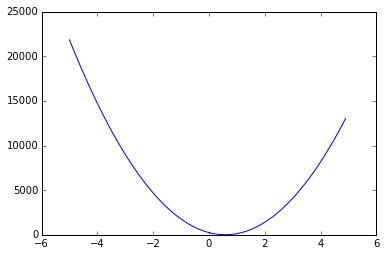

In [7]:
plt.plot(b,chi2[21,:])
plt.show()
#this is a plot of chi2 as a function of j or intercept with i or the slope held at 20
#it is obvious that this slope has a minimum chi2 at an intercept approximately 1

8.31


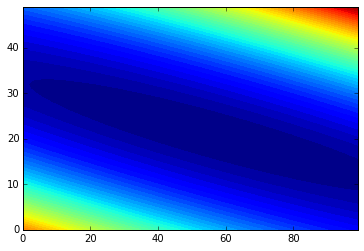

In [8]:
cs=plt.contourf(chi2,50)
print np.min(chi2)
plt.show()

Using the tools above and similar, find the slope and intercept that minimize $\chi^2$.  Answer each of the following questions:

* What are the $m$ and $b$ values that minimize $\chi^2$?
* What uncertainties do you estimate for $m$ and $b$?  Explain your reasoning.
* Are the values of $m$ and $b$ related?  Carefully explain what this means.

Explore!  All "what if" explorations will receive additional credit.

In [9]:
#a=[3,2,1,2,3]
#b=[1,2,3,4,5]
#c=[[A*B for B in  b] for A in a]
#plt.contourf(c,200)

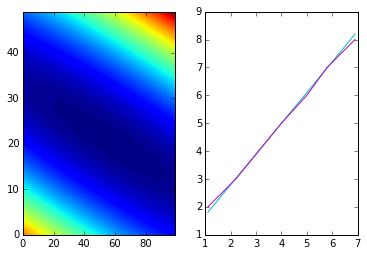

In [10]:
f, axxar = plt.subplots(1,2)
axxar[0].contourf(chi2,100)
axxar[1].plot(x,m[21]*x+b[56],'c-')
axxar[1].plot(x,y,'m-')


by computing all of the possible \chi^2 values in a range of values it is possible to find the two values that produced the minimum one.  This however works in O(n^2) runtime and I believe that a better method must exist.

## Part 1b.  Using Built-in Functions and Interpreting Results

In [11]:
np.polyfit(x, y, 1, cov=True)

(array([ 1.05541648,  0.76325671]), array([[ 0.0004177 , -0.00167676],
        [-0.00167676,  0.00822924]]))

Consult the internet to "reverse engineer" what is going on in the example here. Carefully explain all the outputs of the cell above.

It returns a fit to the data stored in x and y.  It treats x as the x coordinates and y as the y coordinates, the 1 indicates the degree of the polynomial, so in this case the fit is linear.  lastly the kwarg** cov=true indicates that a covariance matrix is also desired, it is that other matrix that gets returned by the function.

## Part 2a.  Fitting Other Curves

Now repeat the exercise by fitting a Gaussian distribution to the data below, perhaps representing results from one of our previous labs.

In [12]:
x=np.array([95.,96.,97.,98.,99.,100.,101.,102.,103.])
yraw=np.array([1.,2.,3.,4.,5.,6.,5.,4.,3.])
y=yraw/(np.sum(yraw))

In [13]:
 #x=np.random.normal(loc=100.,scale=10.,size=1000)
 #histo, bin_edges = np.histogram(x, density=True)
 #bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

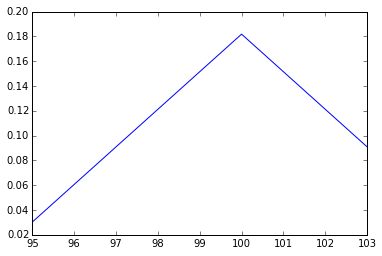

In [14]:
plt.plot(x,y)
plt.show()

In [15]:
def gauss(x, *p):
    mu, sigma = p
    return (1/(sigma*2.506))*np.exp(-(x-mu)**2/(2.*sigma**2))

In [16]:
mean=np.arange(98.,102.,0.01)
sig=np.arange(1.0,6.0,0.01)
chi2=np.zeros([mean.size,sig.size])
for i in range(mean.size):
    for j in range(sig.size):
        chi2[i,j]=sum(((y-(np.exp(-((x-mean[i])**2)/(2.0*(sig[j])**2)))/(sig[j]*np.sqrt(2.0*np.pi)))**2)/1.0**2)

In [17]:
meanfit,sigfit=np.unravel_index(np.argmin(chi2), (mean.size,sig.size))
print mean[meanfit]
print sig[sigfit]

99.92
2.42


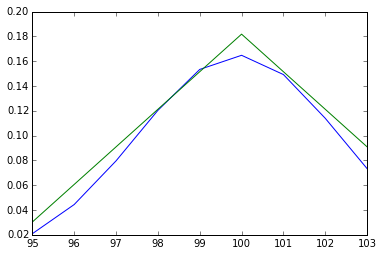

In [18]:
plt.plot(x,(np.exp(-((x-mean[meanfit])**2)/(2.0*(sig[sigfit])**2)))/(sig[sigfit]*np.sqrt(2.0*np.pi)))
plt.plot(x,y)
plt.show()

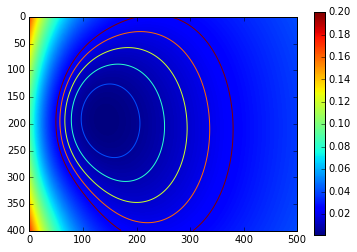

In [19]:
plt.imshow(chi2,vmax=.2)
plt.colorbar()
plt.contour(chi2,levels=np.arange(0,.03,.005))
plt.show()

## Part 2b: Using Built-in Tools and Interpreting Results

In [27]:
from scipy.optimize import curve_fit

In [28]:
x=np.random.normal(loc=100.,scale=10.,size=1000)  #This line creates a distribution of 1000 values centered on 100 
#with a standard deviation of 10

2.50662827463


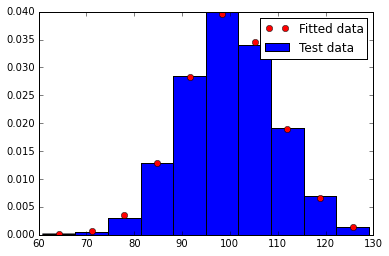

In [32]:
hist, bin_edges = np.histogram(x, density=True) #this creates a histogram with counts and breaks
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2 #this averages the bin borders to find their center points

# Define model function to be used to fit to the data:
def gauss(x, *p):
    mu, sigma = p
    return (1/(sigma*2.506))*np.exp(-(x-mu)**2/(2.*sigma**2))
#1/2.506 is 1/sd\sqrt{2pi} so gauss surprisingly enough multiplies a normalization factor bye^-x-expected x
# Choose initial guess:
p0 = [130., 20.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0) #this checks to see if you can fit a gaussian 
#with the histogram values returned, 
#checking for nans or broken covariance
#Most importantly it finds the parameters to the gauss function that minimize the difference

hist_fit = gauss(bin_centres, *coeff) # this actually fits the data, using the gauss function previously defined, 
#the bin centers as x values and  the coefficients returned by 

plt.hist(x,normed=True, label='Test data')
plt.plot(bin_centres, hist_fit, 'ro',label='Fitted data')
plt.legend()
plt.show()#plot the histogram and the estimated gaussian values

In [30]:
print "Coefficients output =", coeff
print "Variance matrix output =", var_matrix

Coefficients output = [ 99.83505494   9.99378973]
Variance matrix output = [[  7.43369958e-03   2.85838699e-06]
 [  2.85838699e-06   4.96051258e-03]]


Consult the internet to "reverse engineer" what is going on in the example here.  Put comments in the code (using #) to explain what is happening in most of the lines.  You should have enough comments such that you could use this to fit your own data with your own function.

Carefully explain what the printed outputs mean.  Hint:  What is the significance of the next cell's output?

In [31]:
print np.sqrt(np.diag(var_matrix))

[ 0.0862189   0.07043091]


This diagonal entries are the squares of the covariance of the arguments 